## 1. 모듈 모셔오기

In [215]:
# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm # 진행상황 확인용
from sklearn.model_selection import KFold
from sklearn import metrics

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False # minus기호 깨짐 방지

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 2. 데이터 불러오기: 음원_final_data

### 데이터 구조
데이터
관측치 개수
변수 개수

### 설명 변수(원인)

### 반응 변수(결과)

In [216]:
# 데이터셋 로드 및 설명

pd.set_option('display.max_columns', None)

Data_Url = 'C:/WorkPlace/Python_ML_Project/final_data_hyeon.csv'

df = pd.read_csv(Data_Url)

In [217]:
df.set_index(['user_id'])

,refund,personal,smallBiz,middleBiz,bigBiz,sign_in_count_per_day,sfx_free_per_use,sfx_peid_per_sub,song_free_per_use,song_peid_per_sub,kids,vlog,story,beauty,review,talk,game,pet,eating,drone,corporate,freelancer,individual,student,unknown,is_vip,is_vip_period
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
161,0,1,0,0,0,0.081114,0.000000,0.000000,0.004843,0.001938,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
256,0,1,0,0,0,0.031359,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
592,0,1,0,0,0,0.011830,0.055994,73.857143,0.004732,4.285714,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
621,0,1,0,0,0,0.048218,0.003145,0.000000,0.084906,0.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1227,0,1,0,0,0,0.031579,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118062,0,1,0,0,0,0.000000,0.000000,2.571429,0.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
118078,0,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.008219,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
118082,0,0,1,0,0,0.000000,0.000000,4.571429,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 3. 탐색적 데이터 분석 및 데이터 전처리

X: 독립변수, 에측변수, 입력변수
y: 종속변수, 반응변수, 출력변수

In [218]:
# 데이터 프레임 형태로 변환
X = df.iloc[:, 1:].drop(['is_vip_period', 'is_vip', 'personal', 'smallBiz', 'middleBiz', 'bigBiz','unknown'], axis=1)
y = df['is_vip_period']  #vip의 구독개월수 

In [219]:
X.head()

,refund,sign_in_count_per_day,sfx_free_per_use,sfx_peid_per_sub,song_free_per_use,song_peid_per_sub,kids,vlog,story,beauty,review,talk,game,pet,eating,drone,corporate,freelancer,individual,student
0,0,0.081114,0.000000,0.000000,0.004843,0.001938,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0.031359,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.011830,0.055994,73.857143,0.004732,4.285714,0,1,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0.048218,0.003145,0.000000,0.084906,0.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.031579,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [220]:
y.tail()

8370    0
8371    1
8372    0
8373    0
8374    0
Name: is_vip_period, dtype: int64

#### 결측치, 데이터 타입 확인

In [221]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8375 entries, 0 to 8374
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   refund                 8375 non-null   int64  
 1   sign_in_count_per_day  8375 non-null   float64
 2   sfx_free_per_use       8375 non-null   float64
 3   sfx_peid_per_sub       8375 non-null   float64
 4   song_free_per_use      8375 non-null   float64
 5   song_peid_per_sub      8375 non-null   float64
 6   kids                   8375 non-null   int64  
 7   vlog                   8375 non-null   int64  
 8   story                  8375 non-null   int64  
 9   beauty                 8375 non-null   int64  
 10  review                 8375 non-null   int64  
 11  talk                   8375 non-null   int64  
 12  game                   8375 non-null   int64  
 13  pet                    8375 non-null   int64  
 14  eating                 8375 non-null   int64  
 15  dron

In [222]:
X.describe()

,refund,sign_in_count_per_day,sfx_free_per_use,sfx_peid_per_sub,song_free_per_use,song_peid_per_sub,kids,vlog,story,beauty,review,talk,game,pet,eating,drone,corporate,freelancer,individual,student
count,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.00000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000
mean,0.082866,0.364896,0.507245,0.523350,0.207620,0.190359,0.025313,0.18006,0.079522,0.018269,0.034866,0.074507,0.100060,0.022328,0.022448,0.006567,0.063403,0.017672,0.195463,0.177075
std,0.358541,0.840936,9.162654,2.346033,3.044266,0.581145,0.157085,0.38426,0.270569,0.133929,0.183450,0.262611,0.300098,0.147758,0.148143,0.080776,0.243701,0.131763,0.396580,0.381755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.065217,0.000000,0.033223,0.000000,0.006711,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.304613,0.057397,0.285714,0.027933,0.142857,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20.000000,16.000000,796.000000,96.000000,243.000000,17.466667,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train/Test 데이터 분리
Training Data 70% / Test Data 30% 나누기

In [223]:
# Train set / Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (5862, 20)
Test set dimension is (2513, 20)


## 4. 모델링
하이퍼파라미터 결정

### 4.1. 단순 모델링 (사용자가 하이퍼 파라미터 정의)

### 4.2. 단일 하이퍼 파라미터에 대한 Grid search

100%|██████████| 50/50 [01:37<00:00,  1.95s/it]


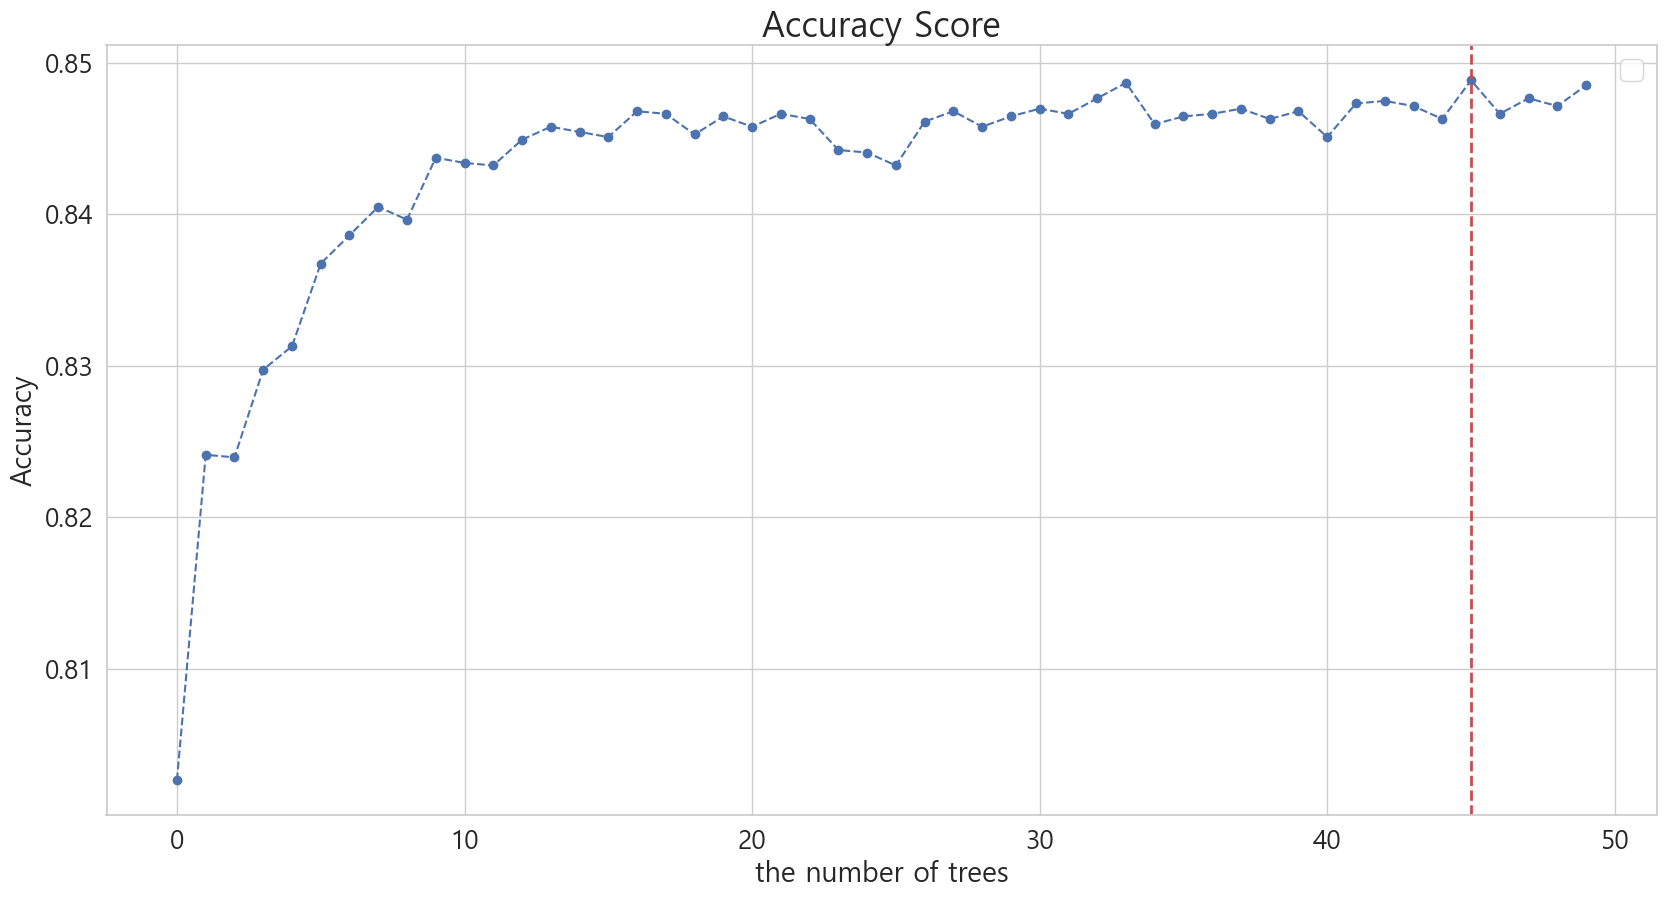

In [226]:
cv_scores = []
estimator_list = [i for i in range(0, 50, 1)]
for i in tqdm(range(0, 50, 1)):
  rfc = RandomForestClassifier(n_estimators=i+1,
                              n_jobs=-1,
                              random_state=2021)
  score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
  cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20, 10))
plt.legend(['Cross valuidation scores'], fontsize = 20)
plt.plot(estimator_list, cv_scores, marker='o', linestyle = 'dashed')
plt.xlabel('the number of trees', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy Score', fontsize = 25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [227]:
print(f'최적의 tree개수:{(cv_scores.index(max(cv_scores))) + 1}')
print('\n')
print('Train set에 대한 성능 (10 fold cross validation)')
print(f'정확도:{max(cv_scores):0.4f}')

최적의 tree개수:46


Train set에 대한 성능 (10 fold cross validation)
정확도:0.8489


In [228]:
rfc = RandomForestClassifier(n_estimators=46, random_state=2021) # 최적 tree 개수인 37 RF모델을 사용하겠다고 '선언'
rfc.fit(X_train, y_train)

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train Set에 대한 성능")
print(f'정확도:{acc:0.4f}')

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('\n')
print("Test Set에 대한 성능")
print(f'정확도:{acc:0.4f}')

Train Set에 대한 성능
정확도:0.9845


Test Set에 대한 성능
정확도:0.6884


### 4.3. 전체 하이퍼 파라미터에 대한 Grid Search

In [229]:
rfc = RandomForestClassifier(random_state=2022)
param_grid = {
  'n_estimators' : [49, 99],
  'max_depth' : [10, 15, 20],
  'max_leaf_nodes' : [50, 100, 200],
  'criterion' : ['gini', 'entropy'],
  'max_features' : ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, verbose = 1, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


c:\Users\lhk68\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2022),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [50, 100, 200],
                         'n_estimators': [49, 99]},
             verbose=1)

In [230]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 200,
 'n_estimators': 99}

In [209]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending = False)
print(result_table[['params', 'mean_test_score']])

                                               params  mean_test_score
29  {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.816788
23  {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.816788
35  {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.816788
16  {'criterion': 'gini', 'max_depth': 10, 'max_fe...         0.816446
4   {'criterion': 'gini', 'max_depth': 10, 'max_fe...         0.816446
..                                                ...              ...
78  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.804162
72  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.804162
60  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.803821
66  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.803821
54  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.803821

[108 rows x 2 columns]


In [231]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

c:\Users\lhk68\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=200, n_estimators=99, random_state=2022)

In [232]:
# Train set에 대한 성능
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train Set에 대한 성능")
print(f'정확도:{acc:0.4f}')

# Test set에 대한 성능
y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('\n')
print("Test Set에 대한 성능")
print(f'정확도:{acc:0.4f}')

Train Set에 대한 성능
정확도:0.9091


Test Set에 대한 성능
정확도:0.8002


In [234]:
recall = recall_score(y_true = y_test, y_pred = y_pred) ## 민감도
precision = precision_score(y_true = y_test, y_pred = y_pred) ## 정밀도

print(f'정확도:{acc:0.4f}', f'민감도:{recall:0.4f}', f'정밀도:{precision:0.4f}', sep=' | ')

정확도:0.8002 | 민감도:0.1622 | 정밀도:0.4566


c:\Users\lhk68\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


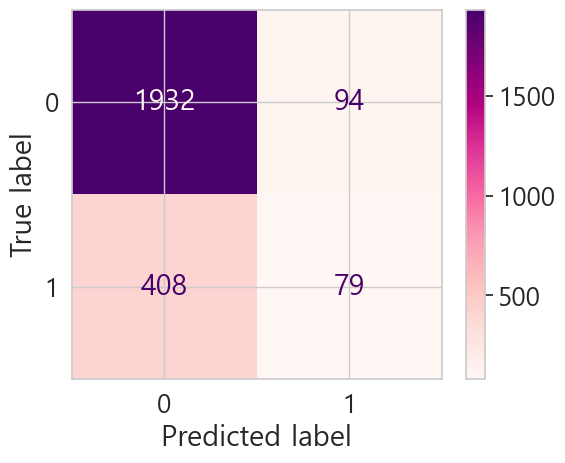

In [235]:
plot_confusion_matrix(best_rfc, X_test, y_test, cmap=plt.cm.RdPu)
plt.show()

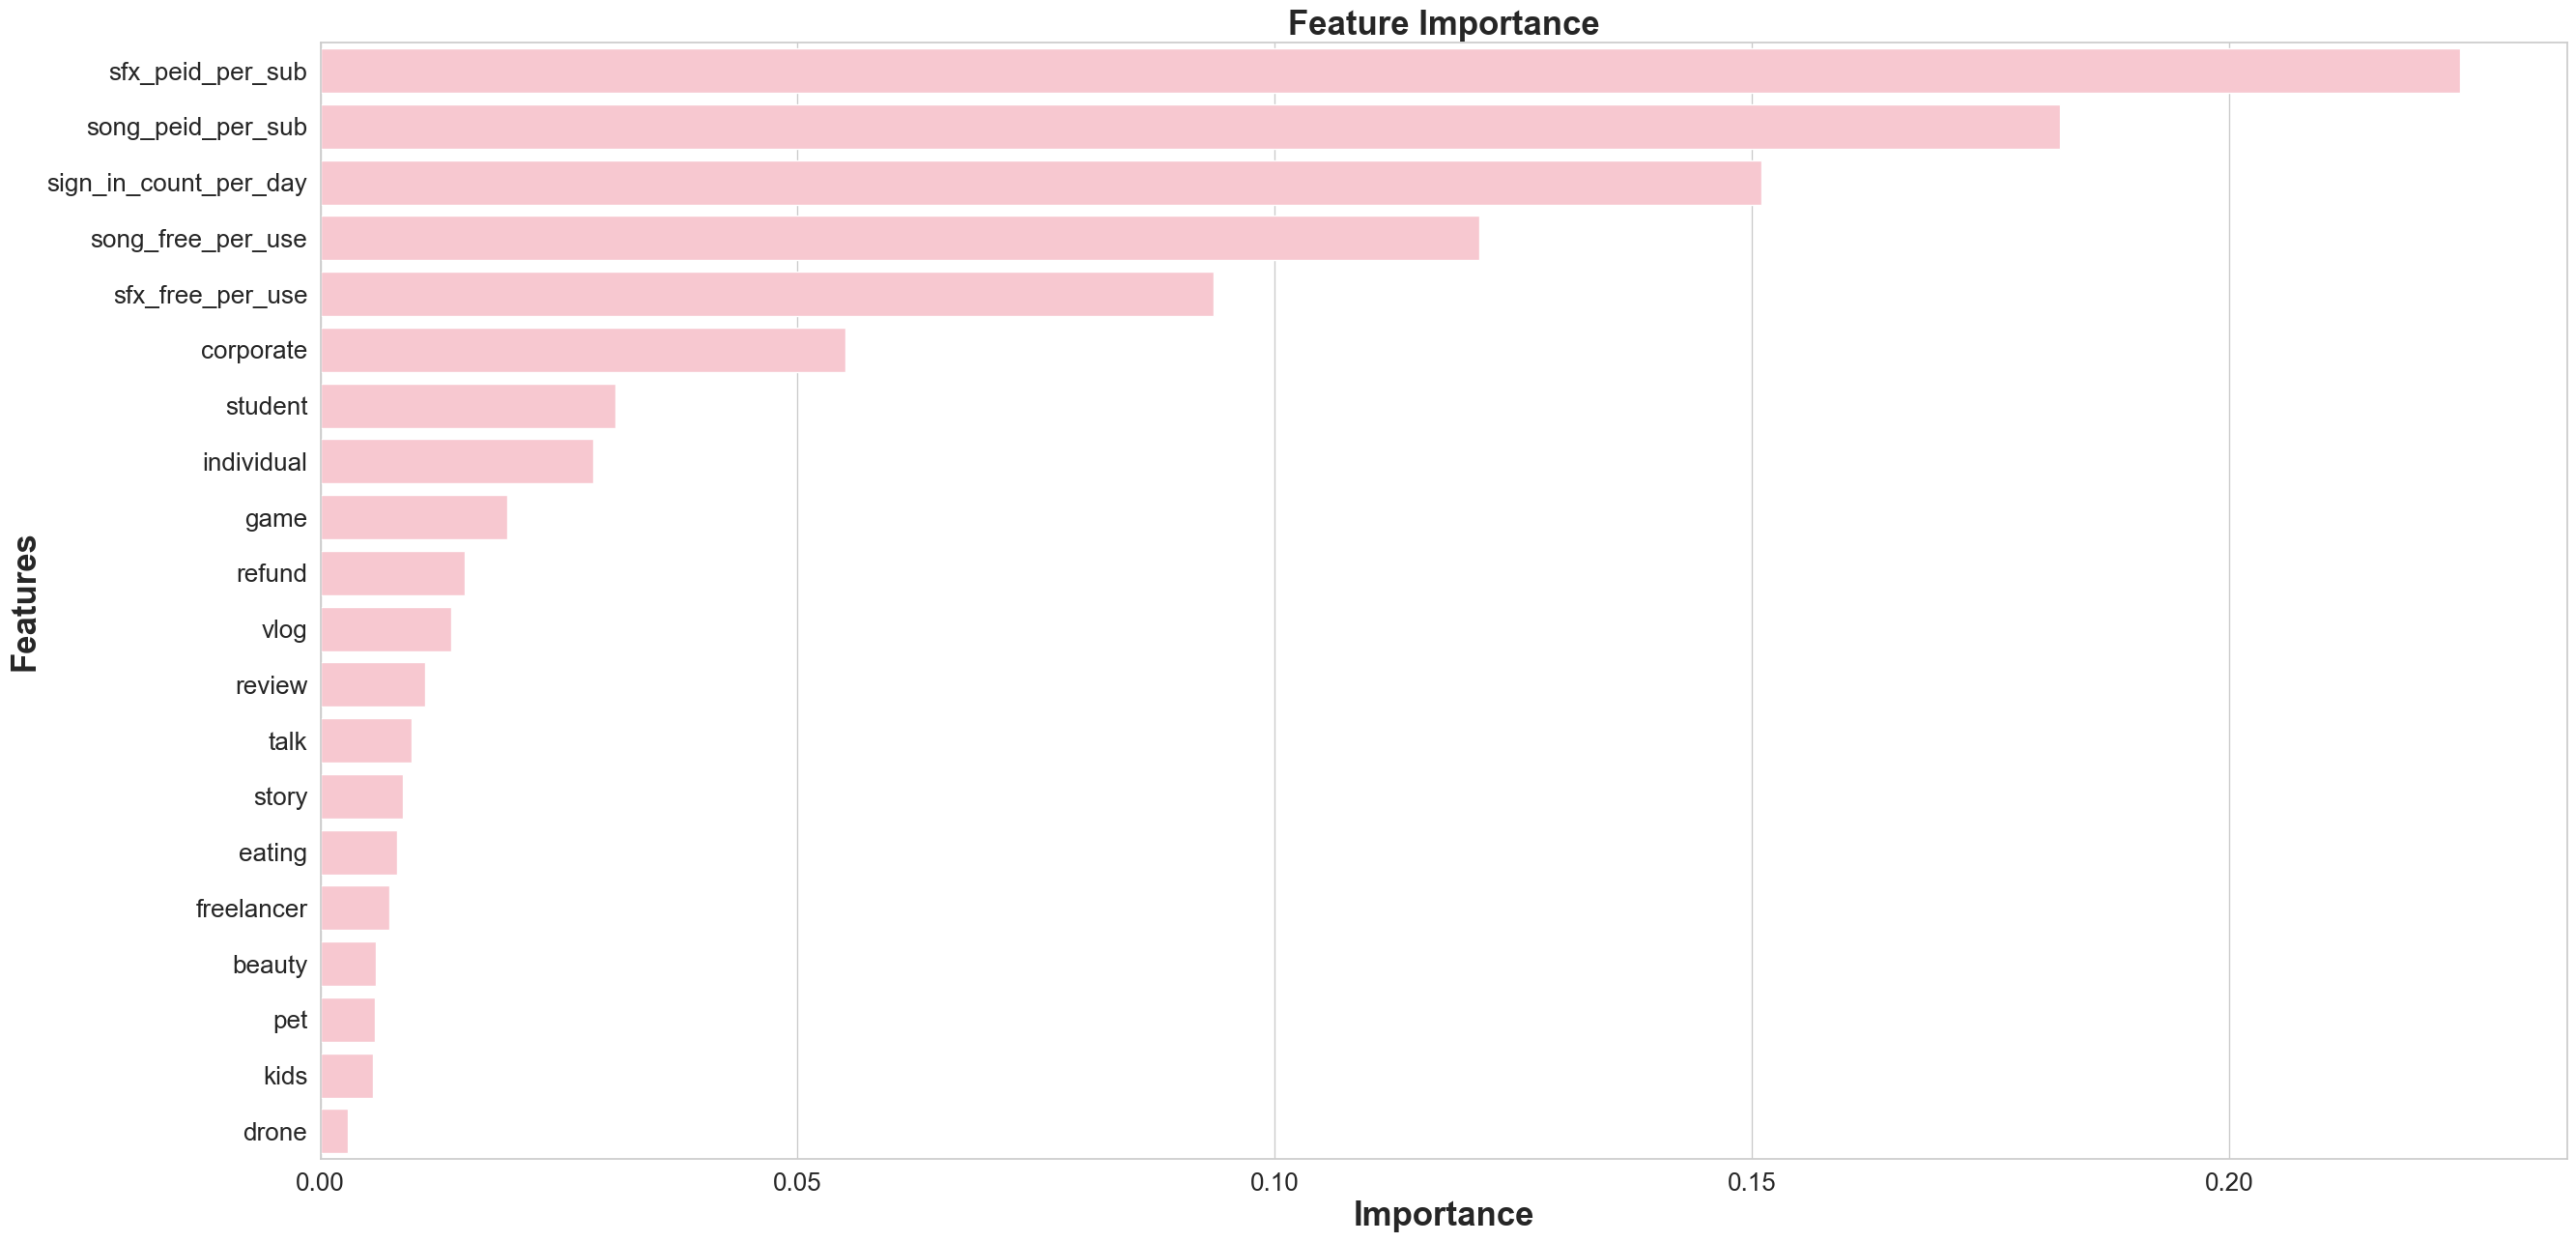

None

,Features,Gini-Importance
0,sfx_peid_per_sub,0.224181
1,song_peid_per_sub,0.182257
2,sign_in_count_per_day,0.151015
3,song_free_per_use,0.121486
4,sfx_free_per_use,0.093630
5,corporate,0.055030
6,student,0.030928
7,individual,0.028611
8,game,0.019603
9,refund,0.015164


In [236]:
feats = {}
for feature, importance in zip(X.columns, best_rfc.feature_importances_):
  feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by = 'Gini-Importance', ascending = False)
importances = importances.reset_index()
importances = importances.rename(columns={'index' : 'Features'})
sns.set(font_scale = 5)
sns.set(style = 'whitegrid', color_codes = True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)
sns.barplot(x = importances['Gini-Importance'], y = importances['Features'], data = importances, color = 'pink')
plt.xlabel('Importance', fontsize = 25, weight = 'bold')
plt.ylabel('Features', fontsize = 25, weight = 'bold')
plt.title('Feature Importance', fontsize = 25, weight = 'bold')
display(plt.show())
display(importances)